In [1]:
import glob
import os
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

### Завантаження та попередня обробка даних

In [55]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_it = datagen.flow_from_directory(os.path.join('clothing-dataset-small', 'train'), class_mode='categorical',
                                       batch_size=64, target_size=(224, 224), color_mode='rgb')

test_it = datagen.flow_from_directory(os.path.join('clothing-dataset-small', 'test'), class_mode='categorical',
                                      batch_size=64, target_size=(224, 224), color_mode="rgb")

val_it = datagen.flow_from_directory(os.path.join('clothing-dataset-small', 'validation'), class_mode='categorical',
                                     batch_size=64, target_size=(224, 224), color_mode="rgb")

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


### Модель без прихованих шарів

In [6]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))         
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m1.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m1', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 16s - loss: 119.5694 - accuracy: 0.1653 - ROC-AUC: 0.5394 - val_loss: 93.7219 - val_accuracy: 0.2375 - val_ROC-AUC: 0.5775
Epoch 2/100
48/48 - 13s - loss: 90.4187 - accuracy: 0.2207 - ROC-AUC: 0.5711 - val_loss: 86.9029 - val_accuracy: 0.1965 - val_ROC-AUC: 0.5557
Epoch 3/100
48/48 - 13s - loss: 79.1514 - accuracy: 0.2448 - ROC-AUC: 0.5864 - val_loss: 119.1507 - val_accuracy: 0.2903 - val_ROC-AUC: 0.6095
Epoch 4/100
48/48 - 12s - loss: 75.3412 - accuracy: 0.2676 - ROC-AUC: 0.6008 - val_loss: 101.3390 - val_accuracy: 0.2023 - val_ROC-AUC: 0.5620
Epoch 5/100
48/48 - 12s - loss: 68.6561 - accuracy: 0.2875 - ROC-AUC: 0.6104 - val_loss: 97.7190 - val_accuracy: 0.2405 - val_ROC-AUC: 0.5778
Epoch 6/100
48/48 - 12s - loss: 58.0979 - accuracy: 0.3149 - ROC-AUC: 0.6276 - val_loss: 101.6555 - val_accuracy: 0.3196 - val_ROC-AUC: 0.6244
Epoch 7/100
48/48 - 12s - loss: 60.3819 - accuracy: 0.3038 - ROC-AUC: 0.6202 - val_loss: 46.3925 - val_accuracy: 0.3636 - val_ROC-AUC: 0.6546
Ep

### Багатошарова мережа

In [7]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh')(x)
x = Dense(56, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))         
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m2.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m2', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 17s - loss: 2.2548 - accuracy: 0.2598 - ROC-AUC: 0.6654 - val_loss: 2.1746 - val_accuracy: 0.2346 - val_ROC-AUC: 0.6679
Epoch 2/100
48/48 - 15s - loss: 2.0641 - accuracy: 0.3126 - ROC-AUC: 0.7079 - val_loss: 2.0982 - val_accuracy: 0.2610 - val_ROC-AUC: 0.6966
Epoch 3/100
48/48 - 14s - loss: 2.0249 - accuracy: 0.3295 - ROC-AUC: 0.7200 - val_loss: 2.0391 - val_accuracy: 0.3138 - val_ROC-AUC: 0.7130
Epoch 4/100
48/48 - 14s - loss: 1.9809 - accuracy: 0.3462 - ROC-AUC: 0.7359 - val_loss: 2.0230 - val_accuracy: 0.3255 - val_ROC-AUC: 0.7120
Epoch 5/100
48/48 - 15s - loss: 1.9517 - accuracy: 0.3608 - ROC-AUC: 0.7444 - val_loss: 2.0395 - val_accuracy: 0.3314 - val_ROC-AUC: 0.7099
Epoch 6/100
48/48 - 12s - loss: 1.9323 - accuracy: 0.3778 - ROC-AUC: 0.7494 - val_loss: 1.9950 - val_accuracy: 0.3460 - val_ROC-AUC: 0.7244
Epoch 7/100
48/48 - 12s - loss: 1.9029 - accuracy: 0.3843 - ROC-AUC: 0.7594 - val_loss: 1.9382 - val_accuracy: 0.3578 - val_ROC-AUC: 0.7489
Epoch 8/100
48/48 - 

In [3]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='relu')(x)
x = Dense(56, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))         
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m8.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m8', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 17s - loss: 3.5871 - accuracy: 0.2148 - ROC-AUC: 0.6042 - val_loss: 2.2828 - val_accuracy: 0.2346 - val_ROC-AUC: 0.6353
Epoch 2/100
48/48 - 13s - loss: 2.2681 - accuracy: 0.2591 - ROC-AUC: 0.6685 - val_loss: 2.2615 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6564
Epoch 3/100
48/48 - 13s - loss: 2.2454 - accuracy: 0.2591 - ROC-AUC: 0.6697 - val_loss: 2.2433 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6555
Epoch 4/100
48/48 - 12s - loss: 2.2257 - accuracy: 0.2591 - ROC-AUC: 0.6748 - val_loss: 2.2278 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6576
Epoch 5/100
48/48 - 13s - loss: 2.2087 - accuracy: 0.2591 - ROC-AUC: 0.6757 - val_loss: 2.2147 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6618
Epoch 6/100
48/48 - 13s - loss: 2.1940 - accuracy: 0.2591 - ROC-AUC: 0.6728 - val_loss: 2.2143 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6219
Epoch 7/100
48/48 - 15s - loss: 2.1572 - accuracy: 0.2591 - ROC-AUC: 0.6717 - val_loss: 2.1495 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6710
Epoch 8/100
48/48 - 

### Використання градієнта Нестерова

In [8]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh')(x)
x = Dense(56, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m3.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m3', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 14s - loss: 2.4727 - accuracy: 0.1965 - ROC-AUC: 0.5999 - val_loss: 2.1636 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6703
Epoch 2/100
48/48 - 13s - loss: 2.0907 - accuracy: 0.2771 - ROC-AUC: 0.6975 - val_loss: 2.1035 - val_accuracy: 0.2405 - val_ROC-AUC: 0.6965
Epoch 3/100
48/48 - 12s - loss: 2.0557 - accuracy: 0.3100 - ROC-AUC: 0.7103 - val_loss: 2.0509 - val_accuracy: 0.3021 - val_ROC-AUC: 0.7129
Epoch 4/100
48/48 - 12s - loss: 2.0229 - accuracy: 0.3341 - ROC-AUC: 0.7219 - val_loss: 2.0262 - val_accuracy: 0.3314 - val_ROC-AUC: 0.7184
Epoch 5/100
48/48 - 12s - loss: 1.9975 - accuracy: 0.3471 - ROC-AUC: 0.7287 - val_loss: 2.0225 - val_accuracy: 0.3343 - val_ROC-AUC: 0.7109
Epoch 6/100
48/48 - 12s - loss: 1.9944 - accuracy: 0.3409 - ROC-AUC: 0.7304 - val_loss: 1.9992 - val_accuracy: 0.3255 - val_ROC-AUC: 0.7270
Epoch 7/100
48/48 - 13s - loss: 1.9347 - accuracy: 0.3572 - ROC-AUC: 0.7486 - val_loss: 1.9960 - val_accuracy: 0.3050 - val_ROC-AUC: 0.7287
Epoch 8/100
48/48 - 

In [4]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='relu')(x)
x = Dense(56, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m9.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m9', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 16s - loss: 3.8410 - accuracy: 0.2301 - ROC-AUC: 0.6074 - val_loss: 2.1604 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6617
Epoch 2/100
48/48 - 13s - loss: 2.1185 - accuracy: 0.2591 - ROC-AUC: 0.6869 - val_loss: 2.1686 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6615
Epoch 3/100
48/48 - 15s - loss: 2.1187 - accuracy: 0.2591 - ROC-AUC: 0.6860 - val_loss: 2.1619 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6707
Epoch 4/100
48/48 - 15s - loss: 2.1060 - accuracy: 0.2591 - ROC-AUC: 0.6918 - val_loss: 2.1292 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6833
Epoch 5/100
48/48 - 16s - loss: 2.1061 - accuracy: 0.2595 - ROC-AUC: 0.6930 - val_loss: 2.1182 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6857
Epoch 6/100
48/48 - 16s - loss: 2.1002 - accuracy: 0.2601 - ROC-AUC: 0.6952 - val_loss: 2.1051 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6884
Epoch 7/100
48/48 - 16s - loss: 2.0921 - accuracy: 0.2614 - ROC-AUC: 0.6992 - val_loss: 2.1536 - val_accuracy: 0.2375 - val_ROC-AUC: 0.6847
Epoch 8/100
48/48 - 

### Використання меншого коефіцієнта навчання

In [9]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh')(x)
x = Dense(56, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m4.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m4', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 15s - loss: 2.1166 - accuracy: 0.2862 - ROC-AUC: 0.7002 - val_loss: 2.0470 - val_accuracy: 0.3167 - val_ROC-AUC: 0.7118
Epoch 2/100
48/48 - 14s - loss: 1.9126 - accuracy: 0.3625 - ROC-AUC: 0.7576 - val_loss: 1.8760 - val_accuracy: 0.3695 - val_ROC-AUC: 0.7706
Epoch 3/100
48/48 - 13s - loss: 1.8170 - accuracy: 0.3967 - ROC-AUC: 0.7852 - val_loss: 1.8656 - val_accuracy: 0.3548 - val_ROC-AUC: 0.7710
Epoch 4/100
48/48 - 13s - loss: 1.7478 - accuracy: 0.4299 - ROC-AUC: 0.8061 - val_loss: 1.8134 - val_accuracy: 0.3812 - val_ROC-AUC: 0.7886
Epoch 5/100
48/48 - 13s - loss: 1.6897 - accuracy: 0.4602 - ROC-AUC: 0.8179 - val_loss: 1.7833 - val_accuracy: 0.4194 - val_ROC-AUC: 0.7945
Epoch 6/100
48/48 - 13s - loss: 1.6402 - accuracy: 0.4726 - ROC-AUC: 0.8308 - val_loss: 1.6887 - val_accuracy: 0.4370 - val_ROC-AUC: 0.8203
Epoch 7/100
48/48 - 12s - loss: 1.6057 - accuracy: 0.4853 - ROC-AUC: 0.8395 - val_loss: 1.6843 - val_accuracy: 0.4457 - val_ROC-AUC: 0.8227
Epoch 8/100
48/48 - 

Epoch 60/100
48/48 - 12s - loss: 0.8543 - accuracy: 0.7591 - ROC-AUC: 0.9685 - val_loss: 1.4932 - val_accuracy: 0.5044 - val_ROC-AUC: 0.8645
Epoch 61/100
48/48 - 13s - loss: 0.8488 - accuracy: 0.7585 - ROC-AUC: 0.9682 - val_loss: 1.4010 - val_accuracy: 0.5308 - val_ROC-AUC: 0.8787
Epoch 62/100
48/48 - 12s - loss: 0.8368 - accuracy: 0.7689 - ROC-AUC: 0.9694 - val_loss: 1.4510 - val_accuracy: 0.5308 - val_ROC-AUC: 0.8694
Epoch 63/100
48/48 - 12s - loss: 0.8279 - accuracy: 0.7666 - ROC-AUC: 0.9701 - val_loss: 1.4148 - val_accuracy: 0.5191 - val_ROC-AUC: 0.8758
Epoch 64/100
48/48 - 12s - loss: 0.8349 - accuracy: 0.7757 - ROC-AUC: 0.9692 - val_loss: 1.4410 - val_accuracy: 0.5367 - val_ROC-AUC: 0.8712
Epoch 65/100
48/48 - 12s - loss: 0.8078 - accuracy: 0.7780 - ROC-AUC: 0.9723 - val_loss: 1.4380 - val_accuracy: 0.5337 - val_ROC-AUC: 0.8716
Epoch 66/100
48/48 - 12s - loss: 0.7942 - accuracy: 0.7852 - ROC-AUC: 0.9734 - val_loss: 1.4420 - val_accuracy: 0.5484 - val_ROC-AUC: 0.8684
Epoch 67/100


### Використання L2 регуляризації

In [13]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2())(x)
x = Dense(56, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2())(x)
x = Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m5.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m5', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 19s - loss: 5.2372 - accuracy: 0.3025 - ROC-AUC: 0.7067 - val_loss: 5.1481 - val_accuracy: 0.3460 - val_ROC-AUC: 0.7440
Epoch 2/100
48/48 - 18s - loss: 5.0500 - accuracy: 0.3732 - ROC-AUC: 0.7612 - val_loss: 5.0231 - val_accuracy: 0.3695 - val_ROC-AUC: 0.7703
Epoch 3/100
48/48 - 20s - loss: 4.9634 - accuracy: 0.4055 - ROC-AUC: 0.7851 - val_loss: 4.9492 - val_accuracy: 0.3900 - val_ROC-AUC: 0.7922
Epoch 4/100
48/48 - 17s - loss: 4.8849 - accuracy: 0.4273 - ROC-AUC: 0.8060 - val_loss: 4.8964 - val_accuracy: 0.4135 - val_ROC-AUC: 0.8036
Epoch 5/100
48/48 - 15s - loss: 4.8222 - accuracy: 0.4488 - ROC-AUC: 0.8191 - val_loss: 4.8615 - val_accuracy: 0.4135 - val_ROC-AUC: 0.8074
Epoch 6/100
48/48 - 15s - loss: 4.7674 - accuracy: 0.4703 - ROC-AUC: 0.8311 - val_loss: 4.8053 - val_accuracy: 0.4633 - val_ROC-AUC: 0.8205
Epoch 7/100
48/48 - 17s - loss: 4.7181 - accuracy: 0.4860 - ROC-AUC: 0.8416 - val_loss: 4.7750 - val_accuracy: 0.4897 - val_ROC-AUC: 0.8247
Epoch 8/100
48/48 - 

Epoch 60/100
48/48 - 15s - loss: 3.6895 - accuracy: 0.7399 - ROC-AUC: 0.9626 - val_loss: 4.2127 - val_accuracy: 0.5601 - val_ROC-AUC: 0.8696
Epoch 61/100
48/48 - 15s - loss: 3.6882 - accuracy: 0.7373 - ROC-AUC: 0.9623 - val_loss: 4.2976 - val_accuracy: 0.4633 - val_ROC-AUC: 0.8580
Epoch 62/100
48/48 - 15s - loss: 3.6681 - accuracy: 0.7461 - ROC-AUC: 0.9640 - val_loss: 4.2395 - val_accuracy: 0.5132 - val_ROC-AUC: 0.8614
Epoch 63/100
48/48 - 13s - loss: 3.6466 - accuracy: 0.7497 - ROC-AUC: 0.9662 - val_loss: 4.2264 - val_accuracy: 0.5249 - val_ROC-AUC: 0.8655
Epoch 64/100
48/48 - 14s - loss: 3.6469 - accuracy: 0.7490 - ROC-AUC: 0.9651 - val_loss: 4.1883 - val_accuracy: 0.5308 - val_ROC-AUC: 0.8700
Epoch 65/100
48/48 - 14s - loss: 3.6265 - accuracy: 0.7604 - ROC-AUC: 0.9671 - val_loss: 4.2016 - val_accuracy: 0.5337 - val_ROC-AUC: 0.8656
Epoch 66/100
48/48 - 14s - loss: 3.6250 - accuracy: 0.7572 - ROC-AUC: 0.9656 - val_loss: 4.1783 - val_accuracy: 0.5455 - val_ROC-AUC: 0.8707
Epoch 67/100


### Використання шару Dropout

In [14]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh')(x)
x = Dropout(0.4)(x)
x = Dense(56, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m6.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m6', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 15s - loss: 2.1858 - accuracy: 0.2464 - ROC-AUC: 0.6667 - val_loss: 2.0675 - val_accuracy: 0.3636 - val_ROC-AUC: 0.7155
Epoch 2/100
48/48 - 15s - loss: 2.0364 - accuracy: 0.3077 - ROC-AUC: 0.7193 - val_loss: 1.9534 - val_accuracy: 0.3372 - val_ROC-AUC: 0.7401
Epoch 3/100
48/48 - 13s - loss: 1.9587 - accuracy: 0.3481 - ROC-AUC: 0.7456 - val_loss: 1.8841 - val_accuracy: 0.3930 - val_ROC-AUC: 0.7668
Epoch 4/100
48/48 - 13s - loss: 1.8611 - accuracy: 0.3761 - ROC-AUC: 0.7736 - val_loss: 1.8915 - val_accuracy: 0.3636 - val_ROC-AUC: 0.7819
Epoch 5/100
48/48 - 13s - loss: 1.8493 - accuracy: 0.3902 - ROC-AUC: 0.7774 - val_loss: 1.8277 - val_accuracy: 0.3783 - val_ROC-AUC: 0.7852
Epoch 6/100
48/48 - 13s - loss: 1.7969 - accuracy: 0.4117 - ROC-AUC: 0.7898 - val_loss: 1.7453 - val_accuracy: 0.4047 - val_ROC-AUC: 0.8052
Epoch 7/100
48/48 - 13s - loss: 1.7568 - accuracy: 0.4309 - ROC-AUC: 0.8003 - val_loss: 1.7522 - val_accuracy: 0.4135 - val_ROC-AUC: 0.8041
Epoch 8/100
48/48 - 

### Використання пакетної нормалізації

In [15]:
inp = Input(shape=(224, 224, 3))
x = Flatten()(inp)
x = Dense(112, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(56, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.25, nesterov=True),
    loss='categorical_crossentropy', 
    metrics=(tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
             tf.keras.metrics.AUC(name='ROC-AUC'))      
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
ch = tf.keras.callbacks.ModelCheckpoint(filepath='m7.h5')
tb = tf.keras.callbacks.TensorBoard('./logs/m7', update_freq=1)
history = model.fit(train_it, validation_data=val_it, callbacks=[es, ch, tb], epochs=100, verbose=2)

Epoch 1/100
48/48 - 14s - loss: 1.8989 - accuracy: 0.3872 - ROC-AUC: 0.7606 - val_loss: 2.1944 - val_accuracy: 0.2082 - val_ROC-AUC: 0.6731
Epoch 2/100
48/48 - 12s - loss: 1.4581 - accuracy: 0.5323 - ROC-AUC: 0.8686 - val_loss: 1.8290 - val_accuracy: 0.3754 - val_ROC-AUC: 0.7807
Epoch 3/100
48/48 - 12s - loss: 1.2626 - accuracy: 0.6056 - ROC-AUC: 0.9104 - val_loss: 1.7696 - val_accuracy: 0.4164 - val_ROC-AUC: 0.7944
Epoch 4/100
48/48 - 12s - loss: 1.1096 - accuracy: 0.6607 - ROC-AUC: 0.9354 - val_loss: 1.6746 - val_accuracy: 0.4428 - val_ROC-AUC: 0.8159
Epoch 5/100
48/48 - 12s - loss: 1.0082 - accuracy: 0.6920 - ROC-AUC: 0.9489 - val_loss: 1.9453 - val_accuracy: 0.3636 - val_ROC-AUC: 0.7689
Epoch 6/100
48/48 - 12s - loss: 0.8851 - accuracy: 0.7480 - ROC-AUC: 0.9642 - val_loss: 1.7843 - val_accuracy: 0.3959 - val_ROC-AUC: 0.8001
Epoch 7/100
48/48 - 12s - loss: 0.7980 - accuracy: 0.7836 - ROC-AUC: 0.9723 - val_loss: 1.8657 - val_accuracy: 0.4106 - val_ROC-AUC: 0.7915
Epoch 8/100
48/48 - 

In [7]:
scores = model.evaluate(val_it, callbacks=[es, ch, tb], verbose=2)

6/6 - 1s - loss: 1.5604 - accuracy: 0.5015 - ROC-AUC: 0.8482


### Всі моделі показують посередню якість передбачення, оскільки архітектура MLP не дозволяє знаходити локальні характеристики/взаємозв'язки в зображеннях, не видаляє надлишкову інформацію, а також є схильною до перенавчання.

### Завантажимо найкращу модель та спробуємо розпізнати нові зображення

In [16]:
model = tf.keras.models.load_model('m5.h5')

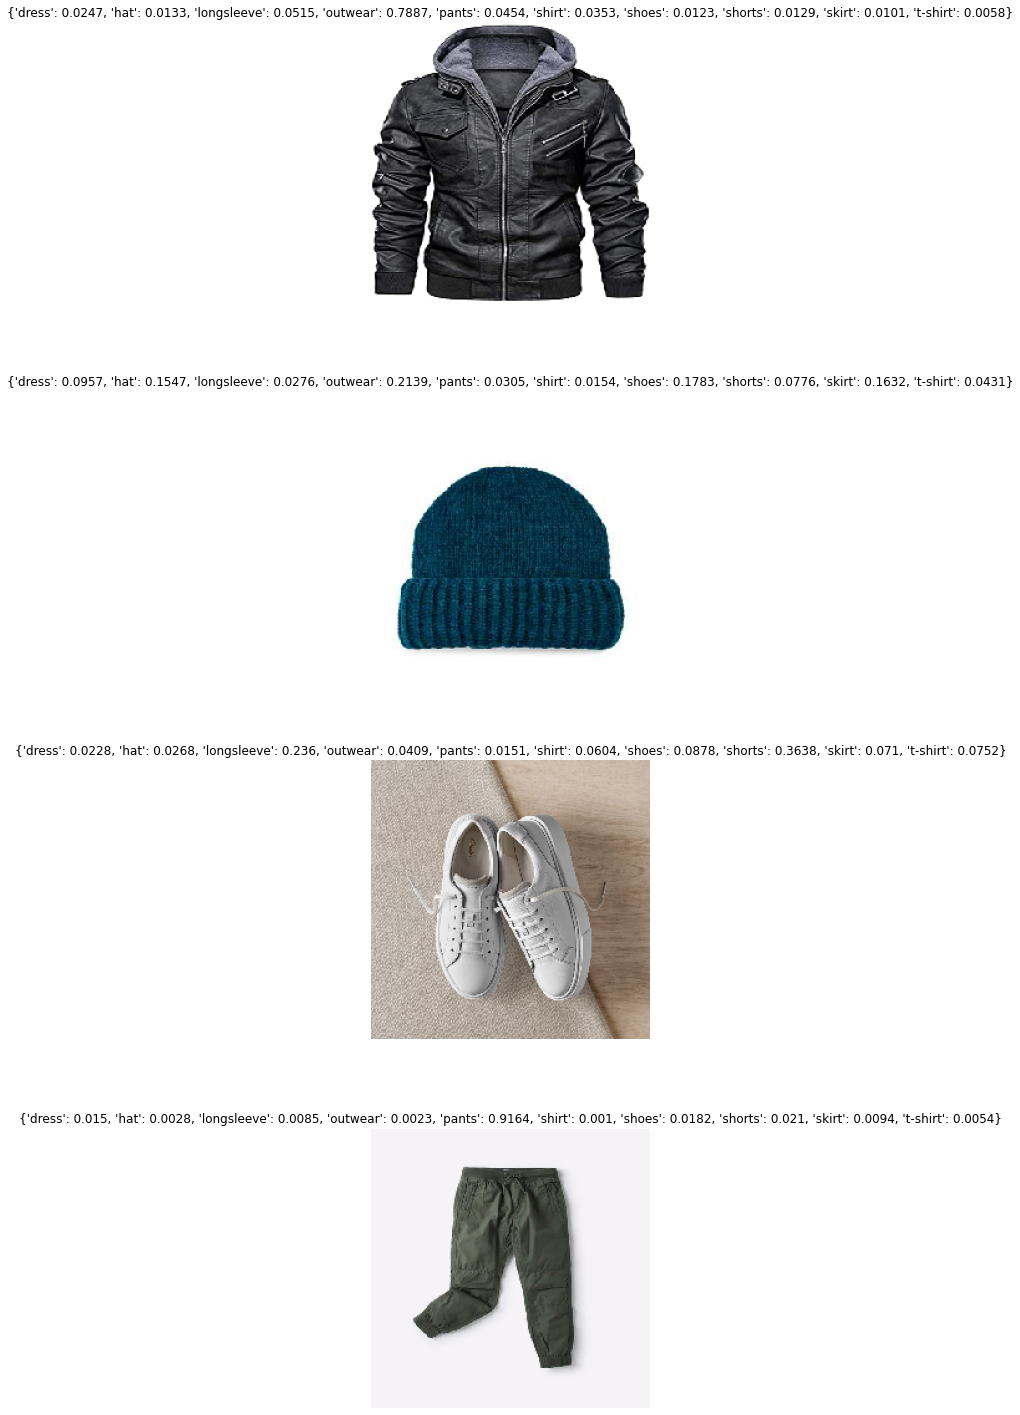

In [17]:
images = glob.glob('images/*')
class_names = list(train_it.class_indices.keys())
fig, axes = plt.subplots(len(images), 1, figsize=(5, 26))
for path, ax in zip(images, axes):
    image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224), color_mode='rgb')
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    image_arr /= 255.
    pred = model.predict(np.array([image_arr]))
    ax.imshow(image_arr)
    ax.set_title(dict(zip(class_names, [round(p, 4) for p in pred[0]])))
    ax.set_axis_off()

In [5]:
%load_ext tensorboard
import tensorflow as tf
import datetime

%tensorboard --logdir logs/